In [1]:
import pandas as pd

D:\Anaconda\envs\ML\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\ML\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Anaconda\envs\ML\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
xls = pd.ExcelFile('../data.xlsx')

In [3]:
xls.sheet_names

['classRoom',
 '1',
 '2',
 '3',
 '4',
 '5',
 '8',
 '9',
 '10',
 '11',
 '13',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '35',
 '36',
 '37',
 '39',
 '41',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 'Combined']

In [4]:
df = {}
for num in xls.sheet_names[1:-1]:
    df[num] = pd.read_excel(xls, num) 

In [5]:
for key in df:
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction = 'both')
    df[key].drop_duplicates(inplace=True)

In [6]:
df_radon = pd.DataFrame(index=df['50'].index)
df_temp = pd.DataFrame(index=df['50'].index)

In [7]:
 for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

1
2
3
4
5
8
9
10
11
13
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
35
36
37
39
41
43
44
45
46
48
49
50


In [126]:
df_radon.corr()

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,1.000000,0.899996,0.437020,0.585928,0.904146,-0.034324,0.660515,0.201970,0.600269,0.784082,...,0.336323,-0.129040,0.433850,0.531201,0.595904,0.710955,0.402333,0.414977,-0.047846,0.776646
Radon_2,0.899996,1.000000,0.572426,0.693490,0.843421,0.080139,0.668593,0.219884,0.721766,0.840884,...,0.411948,-0.162469,0.603331,0.580835,0.208070,0.759962,0.587077,0.556929,-0.081055,0.842449
Radon_3,0.437020,0.572426,1.000000,0.918592,0.389392,0.450997,0.508683,0.437027,0.787483,0.762193,...,0.635710,0.026202,0.734583,0.487700,0.918772,0.602901,0.889030,0.723210,-0.012989,0.781571
Radon_4,0.585928,0.693490,0.918592,1.000000,0.522986,0.276315,0.574838,0.270578,0.817116,0.833564,...,0.426792,-0.168938,0.675139,0.435508,0.900465,0.613049,0.827852,0.732315,-0.167369,0.855753
Radon_5,0.904146,0.843421,0.389392,0.522986,1.000000,-0.062698,0.717653,0.201554,0.602452,0.774642,...,0.316533,-0.158389,0.491741,0.453664,0.532721,0.694786,0.321832,0.466287,-0.055467,0.718391
Radon_8,-0.034324,0.080139,0.450997,0.276315,-0.062698,1.000000,0.021250,0.489987,0.323279,0.229571,...,0.388082,0.266512,0.189314,0.568324,0.287659,0.234056,0.566560,0.235053,0.307312,0.184971
Radon_9,0.660515,0.668593,0.508683,0.574838,0.717653,0.021250,1.000000,0.241700,0.754294,0.756133,...,0.384492,-0.254352,0.709308,0.271895,0.665153,0.730882,0.357799,0.635377,-0.167650,0.750399
Radon_10,0.201970,0.219884,0.437027,0.270578,0.201554,0.489987,0.241700,1.000000,0.381112,0.336781,...,0.510951,0.457373,0.399344,0.393928,0.623662,0.404871,0.270923,0.360148,0.413518,0.339029
Radon_11,0.600269,0.721766,0.787483,0.817116,0.602452,0.323279,0.754294,0.381112,1.000000,0.854132,...,0.525045,-0.169858,0.725648,0.515216,0.777883,0.715106,0.634231,0.923235,-0.115689,0.906656
Radon_13,0.784082,0.840884,0.762193,0.833564,0.774642,0.229571,0.756133,0.336781,0.854132,1.000000,...,0.489597,-0.187186,0.651201,0.578079,0.712724,0.758914,0.699422,0.704735,-0.081532,0.875047


In [127]:
df_radon.corr()['Radon_20']

Radon_1     0.115923
Radon_2     0.312047
Radon_3     0.769493
Radon_4     0.617038
Radon_5     0.087983
Radon_8     0.741296
Radon_9     0.200335
Radon_10    0.439623
Radon_11    0.640318
Radon_13    0.504158
Radon_15    0.136188
Radon_16    0.156070
Radon_17    0.545517
Radon_18    0.337947
Radon_19    0.541231
Radon_20    1.000000
Radon_21   -0.181451
Radon_22    0.146215
Radon_23    0.742650
Radon_25    0.486602
Radon_26    0.417026
Radon_27    0.677248
Radon_28    0.018487
Radon_29    0.771083
Radon_30    0.708194
Radon_31   -0.001897
Radon_32    0.713376
Radon_35    0.218495
Radon_36   -0.118159
Radon_37    0.489664
Radon_39    0.068153
Radon_41    0.438380
Radon_43    0.582717
Radon_44    0.583373
Radon_45    0.306705
Radon_46    0.766770
Radon_48    0.631211
Radon_49    0.074870
Radon_50    0.457300
Name: Radon_20, dtype: float64

In [128]:
df_radon.corr()['Radon_20'] > 0.5

Radon_1     False
Radon_2     False
Radon_3      True
Radon_4      True
Radon_5     False
Radon_8      True
Radon_9     False
Radon_10    False
Radon_11     True
Radon_13     True
Radon_15    False
Radon_16    False
Radon_17     True
Radon_18    False
Radon_19     True
Radon_20     True
Radon_21    False
Radon_22    False
Radon_23     True
Radon_25    False
Radon_26    False
Radon_27     True
Radon_28    False
Radon_29     True
Radon_30     True
Radon_31    False
Radon_32     True
Radon_35    False
Radon_36    False
Radon_37    False
Radon_39    False
Radon_41    False
Radon_43     True
Radon_44     True
Radon_45    False
Radon_46     True
Radon_48     True
Radon_49    False
Radon_50    False
Name: Radon_20, dtype: bool

In [129]:
df_temp.corr()

,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,Temp_8,Temp_9,Temp_10,Temp_11,Temp_13,...,Temp_37,Temp_39,Temp_41,Temp_43,Temp_44,Temp_45,Temp_46,Temp_48,Temp_49,Temp_50
Temp_1,1.000000,0.926809,0.939545,0.938898,0.924263,0.828102,0.863928,0.921011,0.881436,0.822563,...,0.890992,0.952195,0.943406,0.893373,0.902554,0.907422,0.916404,0.885161,0.931871,0.911494
Temp_2,0.926809,1.000000,0.936488,0.947044,0.983118,0.933614,0.941717,0.971138,0.954401,0.930951,...,0.946170,0.961373,0.979960,0.960908,0.916043,0.935734,0.980103,0.943426,0.971728,0.974013
Temp_3,0.939545,0.936488,1.000000,0.995083,0.941916,0.874649,0.884616,0.948708,0.873874,0.854336,...,0.954089,0.905792,0.952146,0.878568,0.894974,0.931260,0.927525,0.935209,0.954692,0.924882
Temp_4,0.938898,0.947044,0.995083,1.000000,0.953491,0.892799,0.895114,0.958289,0.891471,0.873559,...,0.963310,0.917628,0.962406,0.898808,0.904434,0.935200,0.939411,0.948198,0.962435,0.938223
Temp_5,0.924263,0.983118,0.941916,0.953491,1.000000,0.937342,0.959869,0.983441,0.956566,0.933951,...,0.952328,0.961589,0.989922,0.967751,0.912899,0.950097,0.991375,0.954210,0.980763,0.991213
Temp_8,0.828102,0.933614,0.874649,0.892799,0.937342,1.000000,0.940156,0.924139,0.970445,0.977343,...,0.943140,0.899813,0.929487,0.957335,0.927821,0.898892,0.944019,0.960463,0.923381,0.941435
Temp_9,0.863928,0.941717,0.884616,0.895114,0.959869,0.940156,1.000000,0.958224,0.962675,0.942172,...,0.909983,0.924518,0.952483,0.954877,0.919947,0.954858,0.970834,0.929287,0.950825,0.971130
Temp_10,0.921011,0.971138,0.948708,0.958289,0.983441,0.924139,0.958224,1.000000,0.945491,0.919938,...,0.957020,0.949855,0.983516,0.952984,0.931200,0.978253,0.977518,0.956174,0.991763,0.980914
Temp_11,0.881436,0.954401,0.873874,0.891471,0.956566,0.970445,0.962675,0.945491,1.000000,0.973213,...,0.927192,0.951444,0.953129,0.988287,0.942063,0.926850,0.969282,0.951325,0.946969,0.962622
Temp_13,0.822563,0.930951,0.854336,0.873559,0.933951,0.977343,0.942172,0.919938,0.973213,1.000000,...,0.926240,0.903352,0.922733,0.961469,0.937046,0.899779,0.943124,0.949421,0.913360,0.931557


In [130]:
import networkx as nx
#lets try and plot a graph of correlation spatially

In [131]:
A = df_radon.corr()>0.8

In [132]:
A

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_2,True,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Radon_3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
Radon_4,False,False,True,True,False,False,False,False,True,True,...,False,False,False,False,True,False,True,False,False,True
Radon_5,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_11,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,True
Radon_13,False,True,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [133]:
A

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_2,True,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Radon_3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
Radon_4,False,False,True,True,False,False,False,False,True,True,...,False,False,False,False,True,False,True,False,False,True
Radon_5,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_11,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,True
Radon_13,False,True,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [134]:
for i in A.columns:
    A.loc[i][i] = False

In [135]:
A

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_2,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Radon_3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
Radon_4,False,False,True,False,False,False,False,False,True,True,...,False,False,False,False,True,False,True,False,False,True
Radon_5,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_11,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
Radon_13,False,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


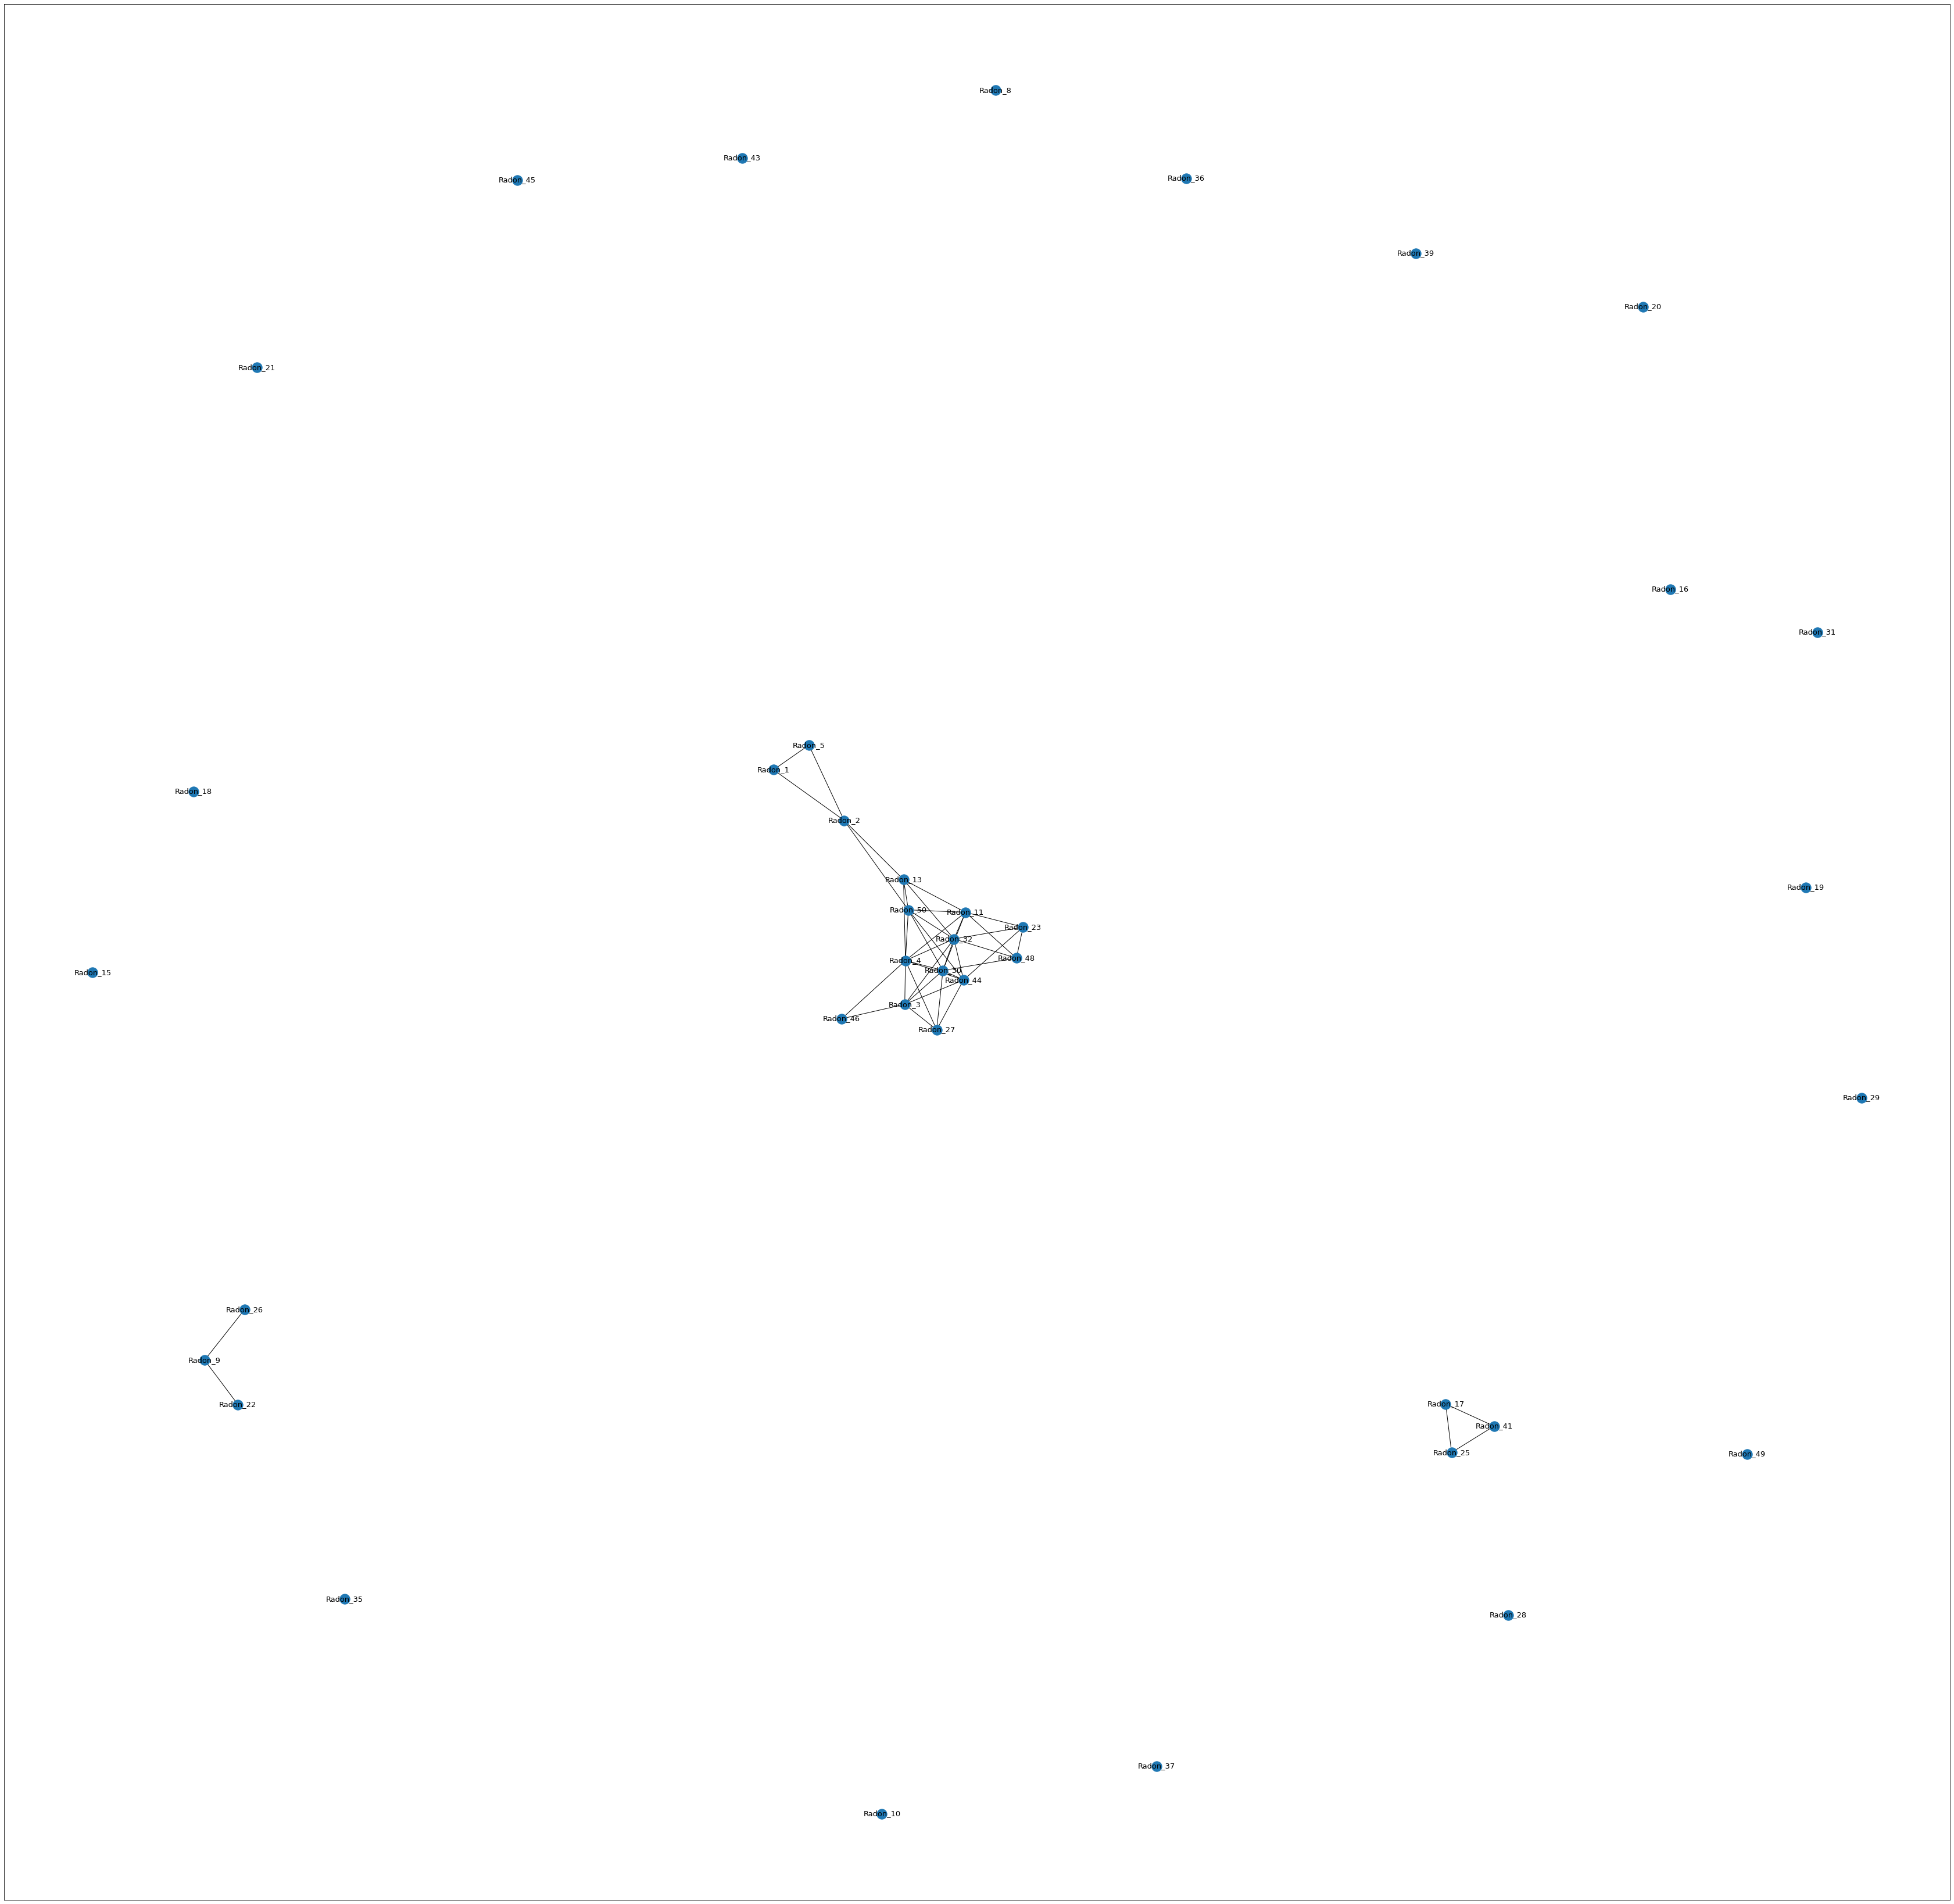

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,60)) 
nx.draw_networkx(nx.from_pandas_adjacency(A), font_size=13)
plt.show()

![alt text](deploy.jpg)
# typo 3,4 is 21

In [137]:
df_radon.corr()['Radon_48']

Radon_1     0.414977
Radon_2     0.556929
Radon_3     0.723210
Radon_4     0.732315
Radon_5     0.466287
Radon_8     0.235053
Radon_9     0.635377
Radon_10    0.360148
Radon_11    0.923235
Radon_13    0.704735
Radon_15    0.016223
Radon_16   -0.101700
Radon_17    0.618088
Radon_18    0.422789
Radon_19    0.584525
Radon_20    0.631211
Radon_21   -0.122618
Radon_22    0.613079
Radon_23    0.846254
Radon_25    0.631003
Radon_26    0.609002
Radon_27    0.708529
Radon_28   -0.052432
Radon_29    0.287732
Radon_30    0.843298
Radon_31   -0.144651
Radon_32    0.829623
Radon_35    0.139216
Radon_36    0.264169
Radon_37    0.407014
Radon_39   -0.157363
Radon_41    0.673282
Radon_43    0.333443
Radon_44    0.753889
Radon_45    0.542339
Radon_46    0.493540
Radon_48    1.000000
Radon_49   -0.092760
Radon_50    0.793844
Name: Radon_48, dtype: float64

# Correlations over windows

# Seasonal Decompose

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [139]:
plt.rcParams.update({'figure.figsize': (60,40)})
decomposition = seasonal_decompose(df_radon["Radon_32"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

ValueError: This function does not handle missing values

In [140]:
df_radon_splined = pd.DataFrame(index=df['50'].index)

In [141]:
for value in df_radon.columns:
    df_radon_splined[f'{value}'] = df_radon[f"{value}"].interpolate(option='spline')

In [143]:
df_radon_splined.corr()

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,1.000000,0.813405,0.437716,0.588807,0.898261,-0.037330,0.665380,0.202540,0.606790,0.788664,...,0.336944,-0.132538,0.434056,0.530306,0.376610,0.715786,0.409339,0.424187,-0.047679,0.779081
Radon_2,0.813405,1.000000,0.555925,0.668834,0.762178,0.079807,0.466430,0.169880,0.644644,0.766729,...,0.408593,-0.162109,0.535249,0.570901,0.330094,0.663450,0.588776,0.512650,-0.072463,0.774279
Radon_3,0.437716,0.555925,1.000000,0.918568,0.389303,0.453543,0.508405,0.436141,0.787450,0.762086,...,0.627369,0.018349,0.735131,0.492831,0.748429,0.603824,0.887802,0.717172,-0.010917,0.781716
Radon_4,0.588807,0.668834,0.918568,1.000000,0.523103,0.278415,0.575102,0.270548,0.818523,0.833339,...,0.422267,-0.175340,0.674705,0.441722,0.633826,0.614041,0.827332,0.725950,-0.165210,0.855823
Radon_5,0.898261,0.762178,0.389303,0.523103,1.000000,-0.062369,0.717714,0.201147,0.599152,0.773883,...,0.310483,-0.158000,0.491953,0.455092,0.386203,0.691593,0.321555,0.472538,-0.054496,0.718351
Radon_8,-0.037330,0.079807,0.453543,0.278415,-0.062369,1.000000,0.016643,0.489330,0.310160,0.231982,...,0.392143,0.268483,0.193746,0.570424,0.412807,0.234020,0.563982,0.233801,0.302204,0.183465
Radon_9,0.665380,0.466430,0.508405,0.575102,0.717714,0.016643,1.000000,0.240782,0.757719,0.755752,...,0.374871,-0.259502,0.706156,0.272309,0.643242,0.731492,0.363722,0.641948,-0.165558,0.750371
Radon_10,0.202540,0.169880,0.436141,0.270548,0.201147,0.489330,0.240782,1.000000,0.372528,0.335858,...,0.510276,0.464017,0.402842,0.402842,0.517004,0.404380,0.268955,0.359460,0.412904,0.338601
Radon_11,0.606790,0.644644,0.787450,0.818523,0.599152,0.310160,0.757719,0.372528,1.000000,0.854076,...,0.516519,-0.176948,0.727209,0.509426,0.672907,0.716748,0.634449,0.922495,-0.114128,0.905954
Radon_13,0.788664,0.766729,0.762086,0.833339,0.773883,0.231982,0.755752,0.335858,0.854076,1.000000,...,0.483014,-0.191592,0.650589,0.576741,0.583335,0.757791,0.699542,0.702679,-0.081692,0.874775


In [148]:
A_splined = df_radon_splined.corr() > 0.8

In [149]:
A_splined

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
Radon_1,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Radon_4,False,False,True,True,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,True
Radon_5,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Radon_11,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,True
Radon_13,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [150]:
for i in A_splined.columns:
    A_splined.loc[i][i] = False

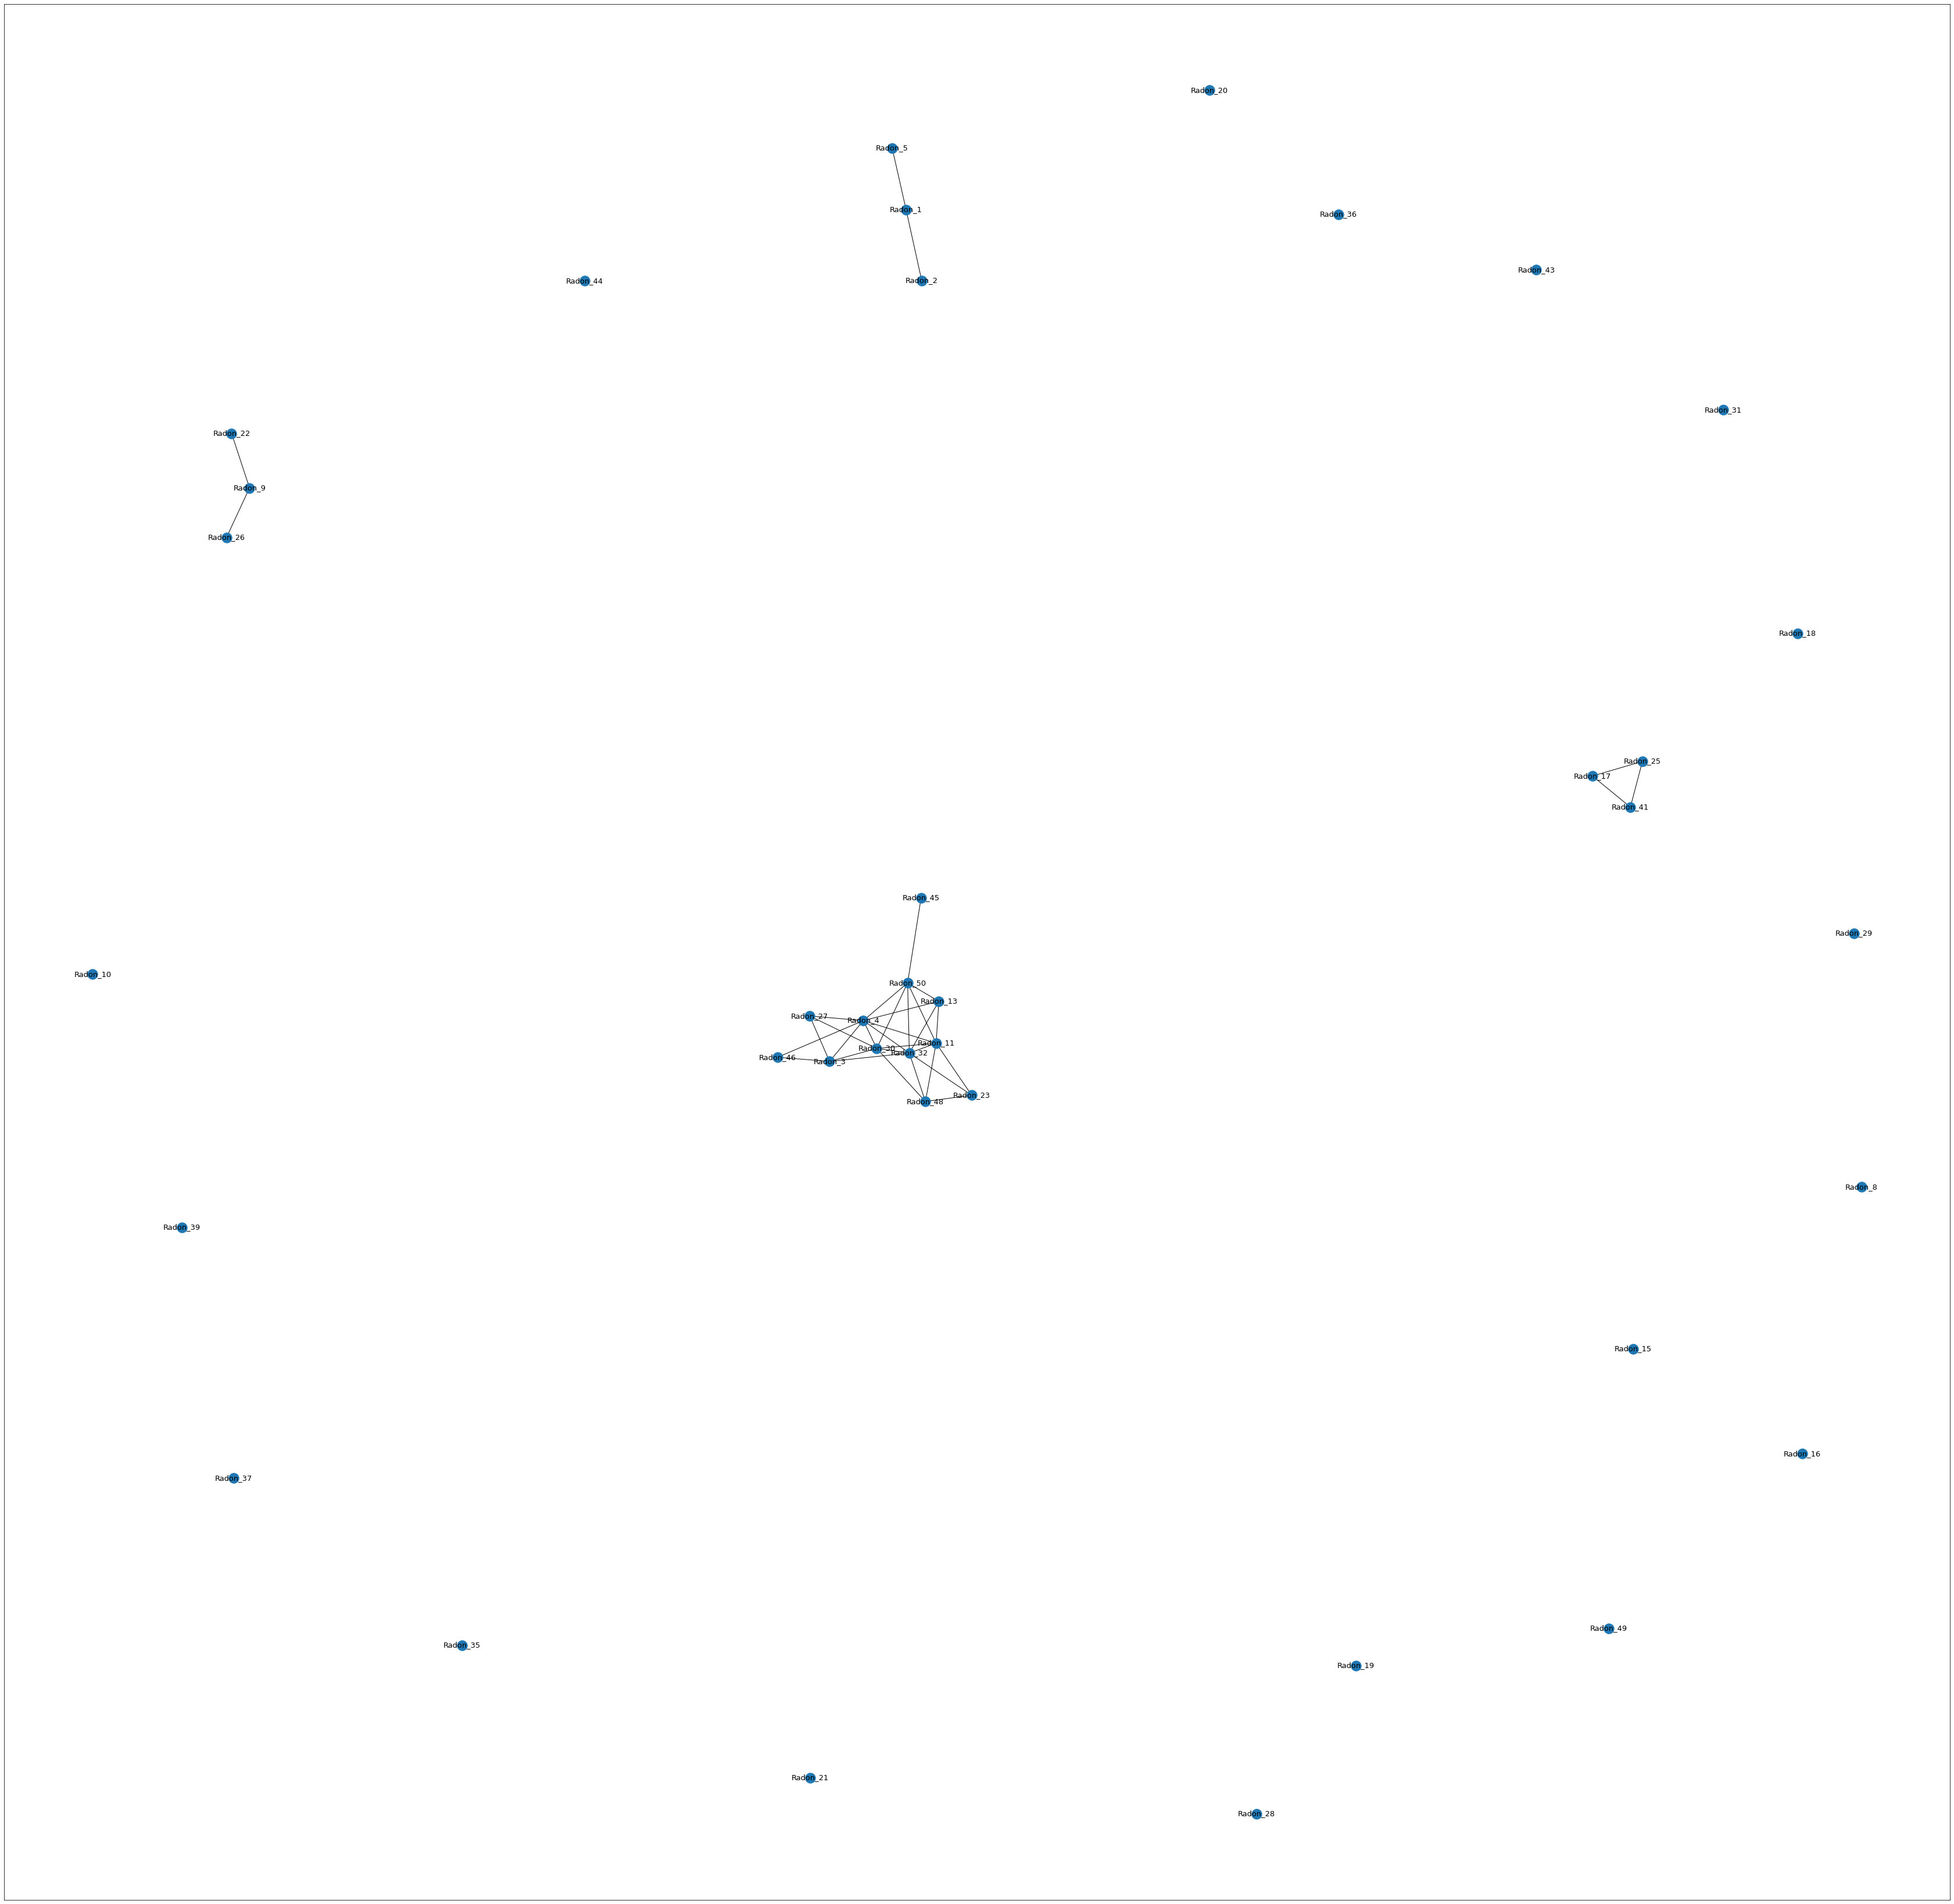

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,60)) 
nx.draw_networkx(nx.from_pandas_adjacency(A_splined), font_size=13)
plt.show()

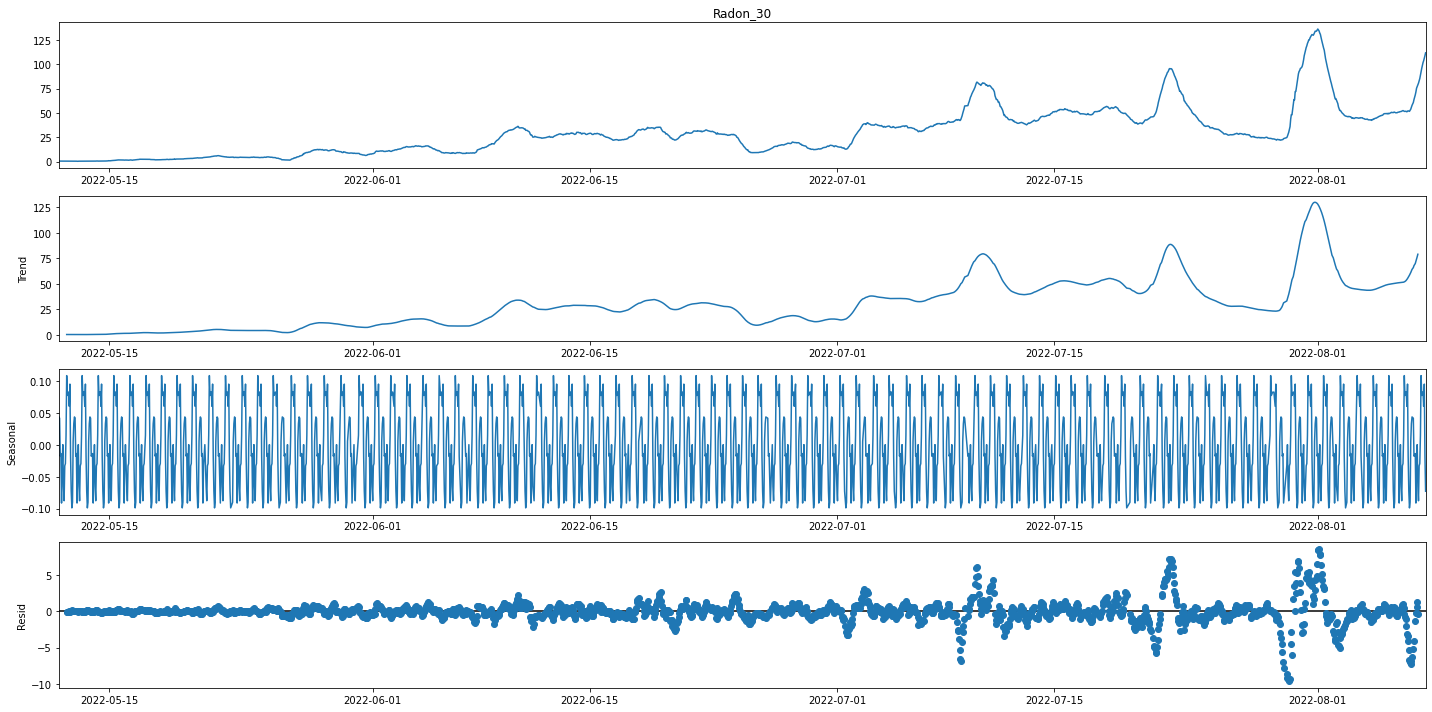

In [152]:
plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_30"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

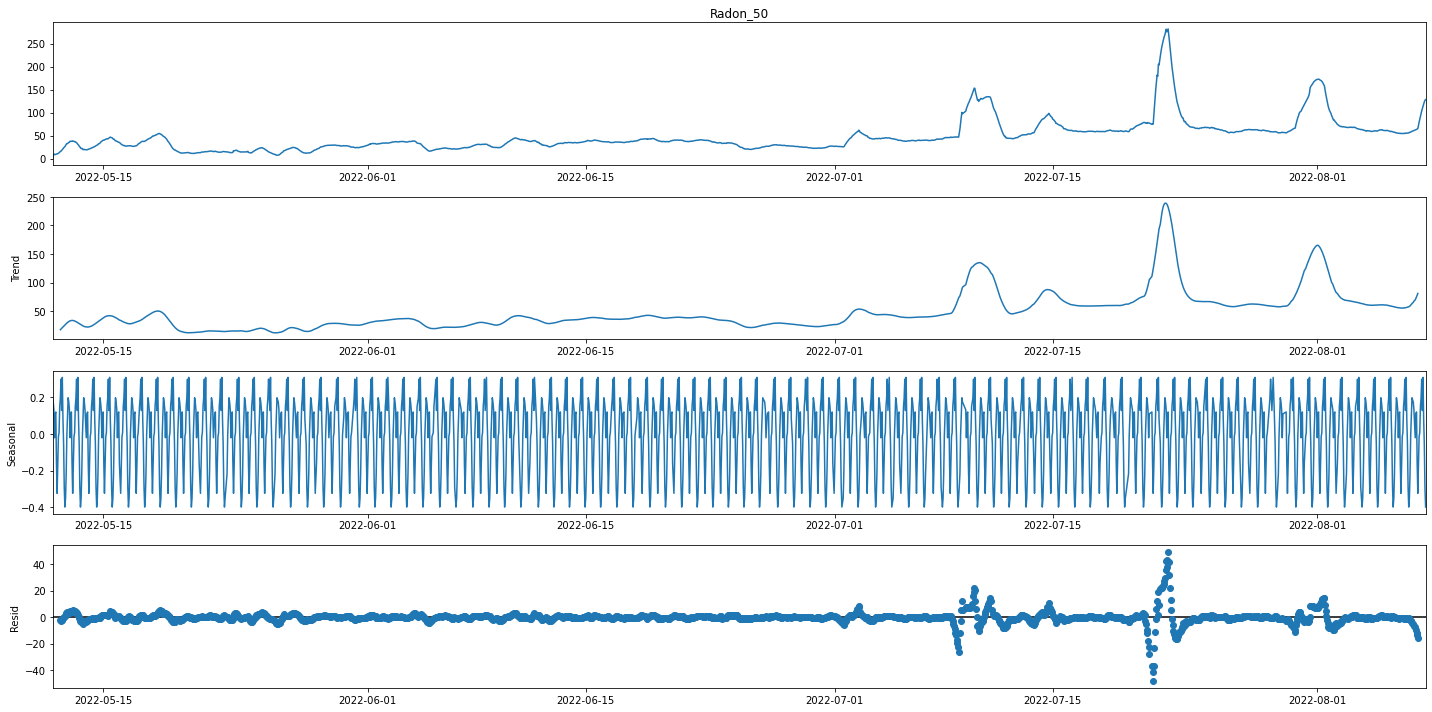

In [153]:
plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_50"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

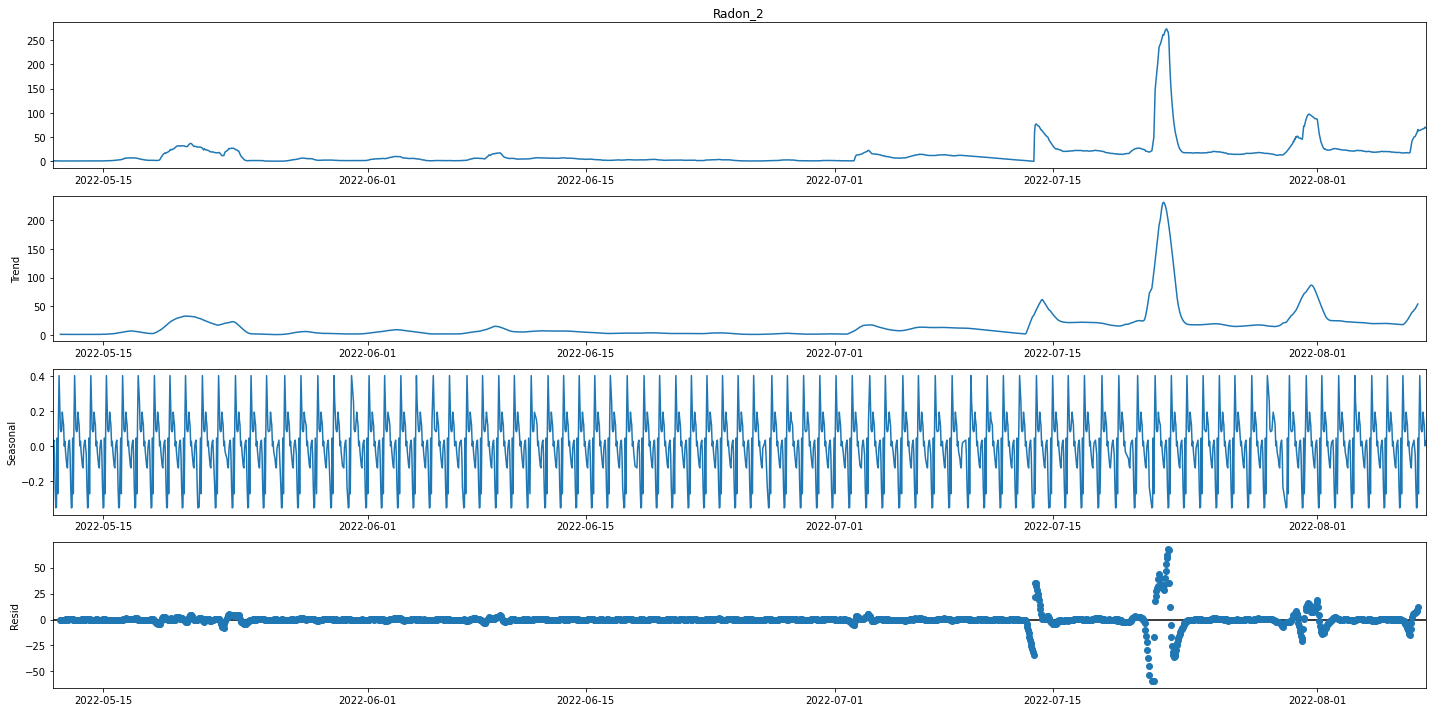

In [154]:
plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_2"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

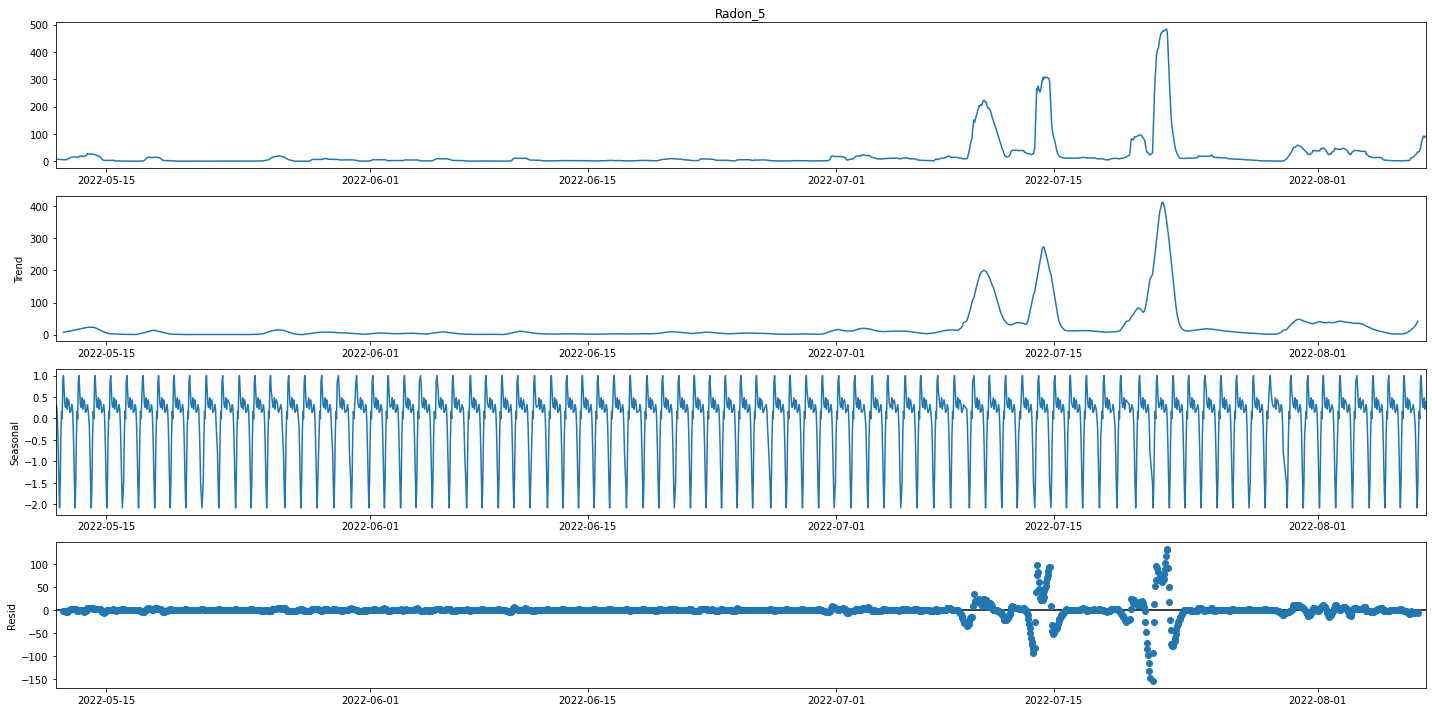

In [155]:
plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_5"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

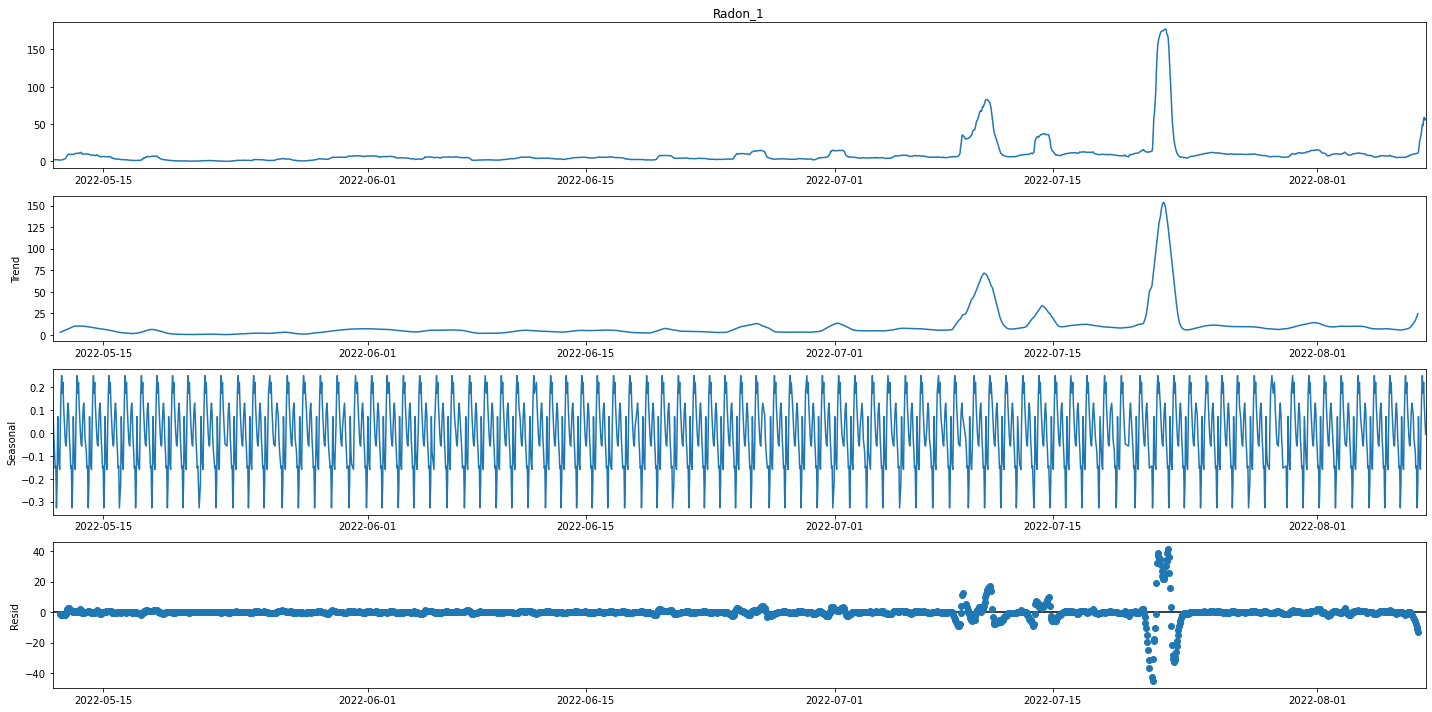

In [156]:
plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_1"], period=24, model='additive')
figure = decomposition.plot()
plt.show()

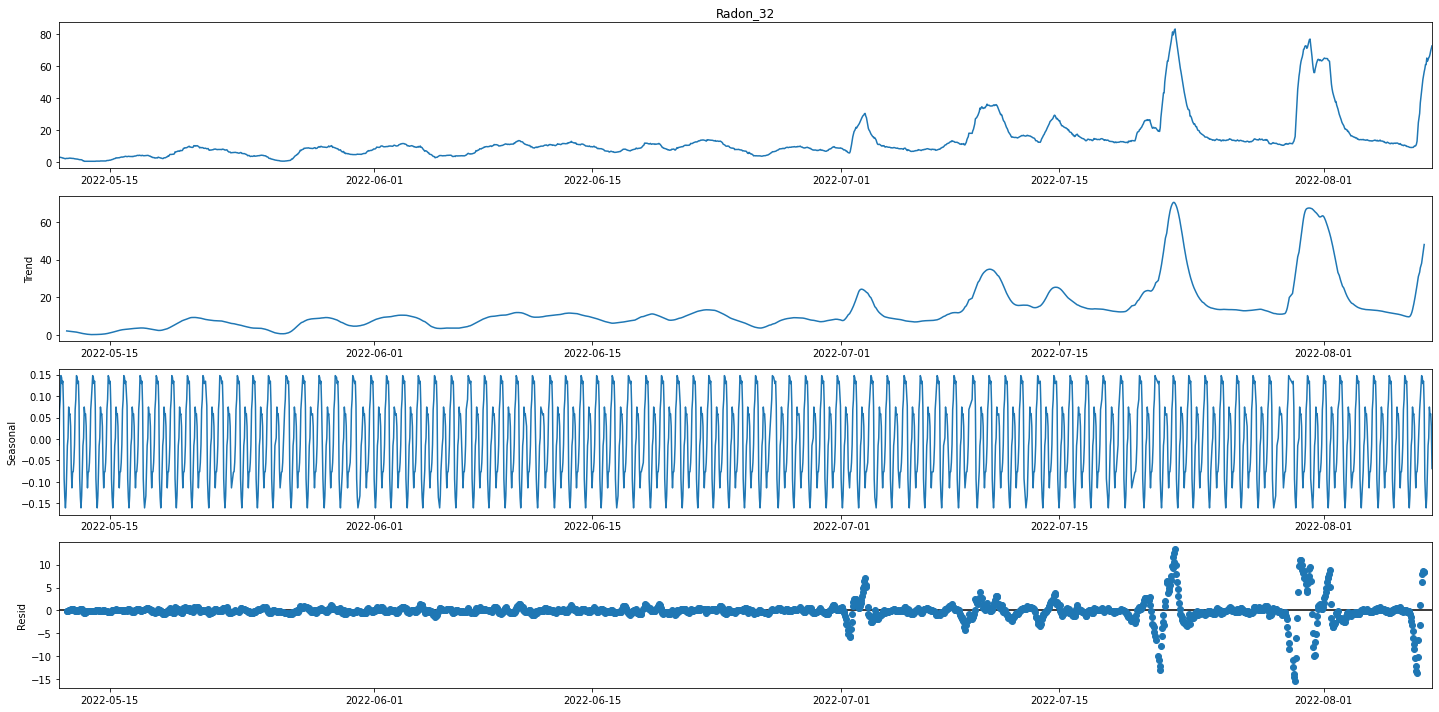

In [157]:
 plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition = seasonal_decompose(df_radon_splined["Radon_32"], period=24, model='additive')
figure = decomposition.plot()
plt.show()